<a href="https://colab.research.google.com/github/Tim-Ganther/DeepLearning/blob/master/nltk/Word_Embedding_Trump.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import re

# Remove punctuation and line-breaks and apply lowercase and generate tokenized sentences
sample_text = open('trump.txt','r').read().lower()
sample_text = re.sub('[%s]' % re.escape('!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'), '', sample_text)
sample_text = sample_text.replace("/n", "")
sample_text = sample_text.replace("mr.", "mr")
sample_text_sentences = sample_text.replace("\n", " ").split('.')

print(sample_text_sentences)

['mr speaker mr vice president members of congress the first lady of the united states and citizens of america tonight as we mark the conclusion of our celebration of black history month we are reminded of our nations path toward civil rights and the work that still remains', ' recent threats targeting jewish community centers and vandalism of jewish cemeteries as well as last weeks shooting in kansas city remind us that while we may be a nation divided on policies we are a country that stands united in condemning hate and evil in all its forms', ' each american generation passes the torch of truth liberty and justice  in an unbroken chain all the way down to the present', ' that torch is now in our hands', ' and we will use it to light up the world', ' i am here tonight to deliver a message of unity and strength and it is a message deeply delivered from my heart', ' a new chapter of american greatness is now beginning', ' a new national pride is sweeping across our nation', ' and a ne

In [91]:
# Remove stop words using nltk and generate tokenized words in tokenized sentences
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
 
stop_words = set(stopwords.words('english')) 

sample_text_full_tokenized = []

for s in sample_text_sentences:
  word_tokens = word_tokenize(s) 
  filtered_text = [w for w in word_tokens if not w in stop_words] 
  filtered_text = [] 
  
  for w in word_tokens: 
      if w not in stop_words: 
          filtered_text.append(w) 
  sample_text_full_tokenized.append(filtered_text)

#print(word_tokens) #unfiltered_text
#print(filtered_text) 
print(sample_text_full_tokenized)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[['mr', 'speaker', 'mr', 'vice', 'president', 'members', 'congress', 'first', 'lady', 'united', 'states', 'citizens', 'america', 'tonight', 'mark', 'conclusion', 'celebration', 'black', 'history', 'month', 'reminded', 'nations', 'path', 'toward', 'civil', 'rights', 'work', 'still', 'remains'], ['recent', 'threats', 'targeting', 'jewish', 'community', 'centers', 'vandalism', 'jewish', 'cemeteries', 'well', 'last', 'weeks', 'shooting', 'kansas', 'city', 'remind', 'us', 'may', 'nation', 'divided', 'policies', 'country', 'stands', 'united', 'condemning', 'hate', 'evil', 'forms'], ['american', 'generation', 'passes', 'torch', 'truth', 'liberty', 'justice', 'unbroken', 'chain', 'way', 'present'], ['torch', 'hands'], ['use', 'light', 'world'], ['tonight', 'deliver', 

In [93]:
# Count word appearance
from collections import Counter
counted = Counter(filtered_text)
counted.most_common()[:10]

[]

(-0.5, 1919.5, 1079.5, -0.5)

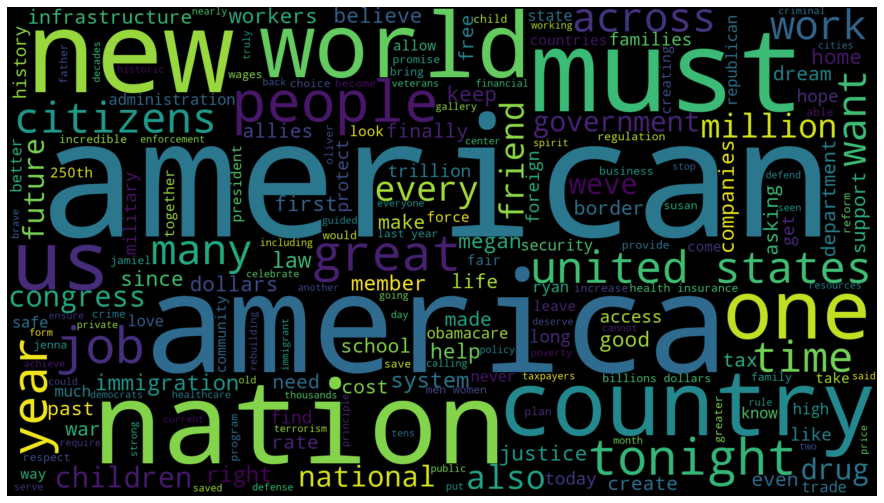

In [97]:
# Display words as a wordcloud
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

# Convert tokenized sentence to string
text_wordcloud = " ".join(sample_text_sentences)

wordcloud = WordCloud(stopwords=stop_words,width=1920,height=1080).generate(text_wordcloud)

# Display the generated image:
plt.figure( figsize=(16,9) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [123]:
# Word2Vec 
import gensim
from gensim.models import Word2Vec

model = gensim.models.Word2Vec(sample_text_full_tokenized, min_count = 1, size = 100, window = 5)

print("Cosine similarity between 'united' " + 
               "and 'states' - CBOW : ", 
    model.similarity('united', 'states')) 

Cosine similarity between 'united' and 'states' - CBOW :  0.019400625


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
